In [1]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import IPython.display as ipd
import pandas as pd
from carat import annotations, audio, display, microtiming, util
import onsetsync
%matplotlib inline

### File Paths

In [2]:
meter_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_C_Marker in sec.csv'
D1_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Dun_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'
J1_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Jem-1_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'
J2_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Jem-2_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'

### Load Onset annotations

In [3]:
df = onsetsync.get_df_csv([D1_path, J1_path, J2_path], delimiter=';', concat_axis=1, header=None)

# Add header to the dataframe
df.columns = ['D1', 'J1', 'J2']
df.head()

,D1,J1,J2
0,8.551000,5.881667,10.951000
1,10.073667,6.143000,11.161667
2,10.484333,6.335000,11.569667
3,10.889667,6.428333,11.785667
4,11.127000,6.543000,12.207000


### Load Meter annotations

In [61]:
meter_df = onsetsync.get_df_csv(meter_path, delimiter=';')
meter_df.columns = ['Cycle.Time']
meter_df.tail()

,Cycle.Time
203,331.530
204,332.748
205,333.981
206,335.231
207,336.578


### Visualise Onsets and Cycle Starts

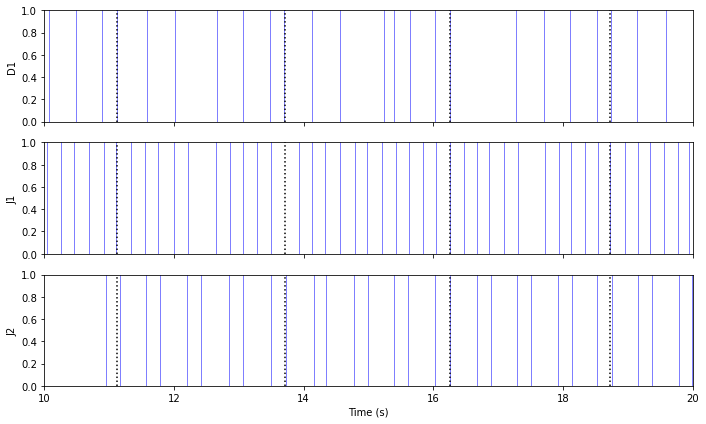

In [70]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 6))

# Plot each instrument column as subplots
for i, column in enumerate(df.columns):
    for value in df[column]:
        axes[i].axvline(x=value, ymin=0, ymax=1, color='b', linewidth=0.5)
    
    # Overlay cycle start annotations
    for meter in meter_df['Cycle.Time']:
        axes[i].axvline(x=meter, ymin=0, ymax=1, color='black', linestyle='dotted')

    # Time range 10s to 20s
    axes[i].set_xlim(10, 20) 
    axes[i].set_ylim(0, 1)  # Limit y-axis from 0 to 1 for visualization
    axes[i].set_ylabel(column)

# Set shared x-axis label
axes[-1].set_xlabel('Time (s)')

# Show the plot
plt.tight_layout()
plt.show()

### Create new DF by interpolating Cycles into 12 subdivisions

In [80]:
num_div = 12

# Create interpolated points
cycle_times = meter_df['Cycle.Time'].to_numpy()

interp_time = [np.linspace(cycle_times[i], cycle_times[i + 1], num_div+1)[:-1] for i in range(len(cycle_times) - 1)]
interp_time = np.concatenate(interp_time)
interp_time = np.append(interp_time, cycle_times[-1])

# Create cycle numbers
cycle_numbers = np.repeat(np.arange(1, len(cycle_times)), num_div)
cycle_numbers = np.append(cycle_numbers, len(cycle_times))

# Create a dataframe
new_df = pd.DataFrame({
    'Cycle': cycle_numbers,
    'Subdivision': np.append(np.tile(np.arange(1, num_div+1), len(cycle_times) - 1), 1),
    'Iso.Time': interp_time       
})

# Insert original cycle times at subdivision 1 positions
new_df['Cycle.Time'] = np.nan  # Initialize the column with NaN
new_df.loc[new_df['Subdivision'] == 1, 'Cycle.Time'] = cycle_times

# Re-arrange columns
new_df = new_df[['Cycle','Cycle.Time','Subdivision','Iso.Time']]

# Add instrument columns
new_df[['D1', 'J1', 'J2']] = np.nan

In [81]:
new_df.tail(13)

,Cycle,Cycle.Time,Subdivision,Iso.Time,D1,J1,J2
2472,207,335.231,1,335.23100,NaN,NaN,NaN
2473,207,NaN,2,335.34325,NaN,NaN,NaN
2474,207,NaN,3,335.45550,NaN,NaN,NaN
2475,207,NaN,4,335.56775,NaN,NaN,NaN
2476,207,NaN,5,335.68000,NaN,NaN,NaN
2477,207,NaN,6,335.79225,NaN,NaN,NaN
2478,207,NaN,7,335.90450,NaN,NaN,NaN
2479,207,NaN,8,336.01675,NaN,NaN,NaN
2480,207,NaN,9,336.12900,NaN,NaN,NaN
2481,207,NaN,10,336.24125,NaN,NaN,NaN
